# Задача классификации. Логистическая регрессия



In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.figsize"] = [12, 8]

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn import datasets

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Логистическая регрессия

В этой секции создадим искусственные данные. Покажем какая математика кроется внутри и как пишутся библиотеки, которые мы будем использовать. 

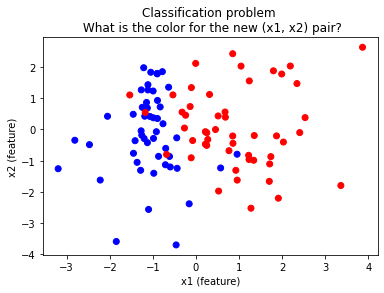

In [6]:
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=1)
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=0,n_classes=2)
colors = ['red' if y_i else 'blue' for y_i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)");

In [7]:
print(y)

[0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0]


# Линейный классификатор

Построим случайную прямую. Насколько хорошо она описывает данные?

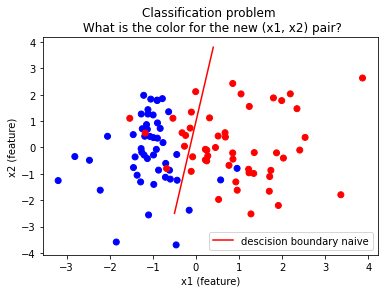

In [8]:
x_naive = np.arange(-0.5, 0.5, 0.1)
y_naive = 7 * x_naive + 1

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend();

## Как принимается решение

Простой вариант - узнать, с какой стороны от гиперплоскости находится точка

$$\hat{y} = sign(x\theta)$$

In [9]:
w = np.array([7, -1, 1]) # Ax + By + C = 0
     
# Замечание: расстояние от точки (x0, y0) до прямой Ax + By + C это abs(Ax0 + By0 + C) / sqrt(A^2 + B^2)
    
def predict(x, w):
    return np.sign(x.dot(w))

x_pred = np.hstack([np.random.rand(10, 2) * 4 - 2, np.ones(10).reshape(-1, 1)])
y_pred = predict(x_pred, w)

print(x_pred.shape)
print(y_pred.shape)

(10, 3)
(10,)


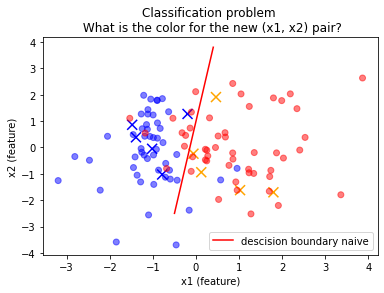

In [10]:
x_naive = np.arange(-0.5, 0.5, 0.1)
# naive boundary
y_naive = 7 * x_naive + 1

plt.scatter(x_pred[:, 0], x_pred[:, 1], c=['orange' if y_i > 0 else 'blue' for y_i in y_pred], marker='x', s=100)
plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.5)
plt.plot(x_naive, y_naive, c='red', label='descision boundary naive')
plt.legend();

## Как померить результат - простой вариант

Отступ (margin) - величина $M_i = y_i \cdot x_i\theta$ (для $y = 1$ или $y = -1$), где $x_i$ - элемент обучающей выборки, $y_i$ - его класс

$$M_i \leq 0 \Rightarrow y_i \neq \hat{y_i}$$
$$M_i > 0 \Rightarrow y_i = \hat{y_i}$$

Функция потерь zero-one loss:
$$ f(x) = \begin{cases}
      1, & \text{если}\space \hat{y} \neq y, \\
      0, & \text{если}\space \hat{y} = y
    \end{cases}
$$ 

Эмпирический риск:
$$Q(\theta, x) = \frac{1}{n} \sum_{i=1}^{n} f(x) = \frac{1}{n} \sum_{i=1}^{n}[M_i < 0]$$

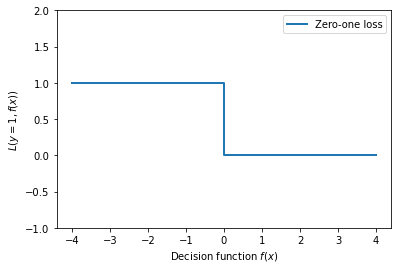

In [11]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
# plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 2));

## Переформулируем задачу
Вместо класса будем предсказывать вероятность принадлежности классу

$$\hat{p} = \sigma(x\theta) $$

где 

$$\sigma(t)=\frac{1}{1 + exp(-t)}$$

Пусть P вероятность принадлежности к классу. Тогда отношение шансов (odds ratio):


$$ OR = \frac{P} {1 - P} $$ <br>
$$ log {OR} \in R$$

Научились делать предсказание для $log {OR}$ с помощью линейной регрессии. Что делать теперь?

$$ log OR = x \theta$$

$$ P(y_i = 1 | x, \theta) = \frac {OR} {1 + OR} = \frac{e^{x\theta}} {1 + e^{x\theta}} = \sigma(x\theta) $$

$$ P(y_i = -1 | x, \theta) = ... = \sigma(-x\theta)$$

$$ P(y | x, \theta) = \prod_i {P(y = y_i \mid x_i, \theta)}$$


### Упражнение
упростите последнее выражение
- возьмем логарифм
- используем правило для логарифма произведения
- используем правило для логарифма частного

В результате должно получиться:
$ \log P(y | x, \theta) = -\sum {\log {(1 + e ^ {-y_i x \theta})}}$

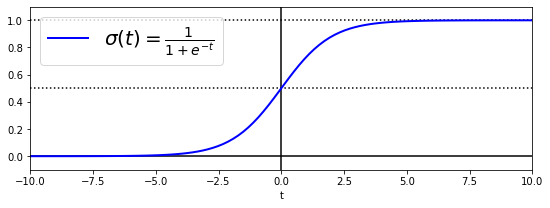

In [12]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show() 

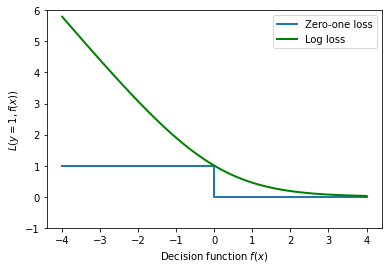

In [13]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], lw=lw, label="Zero-one loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='green', lw=lw, label="Log loss")
plt.xlabel(r"Decision function $f(x)$")
plt.legend(loc="upper right")
plt.ylabel("$L(y=1, f(x))$")
plt.ylim((-1, 6));

## В sklearn

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(-2, 2, 500).reshape(-1, 1),
        np.linspace(-3, 3, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

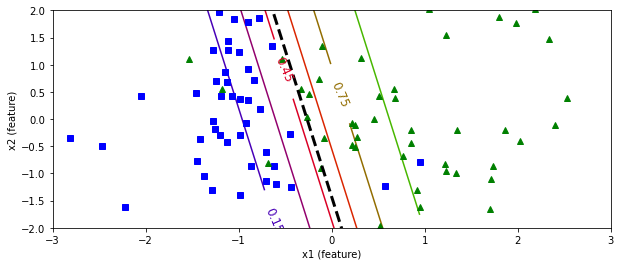

In [15]:
#Визуализация

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.axis([-3, 3, -2, 2])
plt.show()

In [16]:
# знакомый нам датасет
data = pd.read_csv('column_2C_weka.csv')



In [17]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


## Classes and attributes
The dataset includes six biomechanical attributes of the patient and the outcome or pathology. The attributes describe the vertebral column (group of vertebras, invertebrate discs, nerves, muscles, medulla and joints). These spino-pelvic system parameters include angle of pelvic incidence (PI), angle of pelvic tilt (PT), lordosis angle, sacral slope (SS), pelvic radius, and grade of slipping.

Each patient has six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius, and grade of spondylolisthesis. There is also a class or diagnosis for each patient–either binary: Normal (NO) and Abnormal (AB) or multiclass: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO)
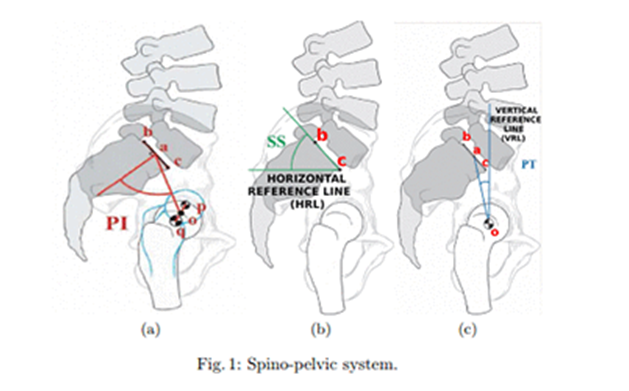

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# перекодируем целевую
data['class'] = data['class'].apply(lambda x: 1 if x=='Abnormal' else 0)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42, stratify=data['class']
)

In [20]:
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))
'''

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def quality_report(prediction, actual):
    print("Accuracy: {:.3f} \n".format(
        accuracy_score(prediction, actual)))

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test), y_test)

Train quality:
Accuracy: 0.843
Precision: 0.881
Recall: 0.886
f1_score: 0.884

Test quality:
Accuracy: 0.887
Precision: 0.905
Recall: 0.927
f1_score: 0.916


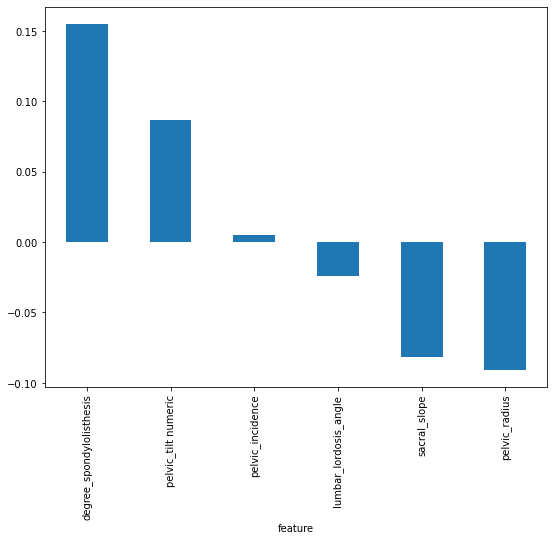

In [23]:
featureImportance = pd.DataFrame({"feature": data.drop('class',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(9, 7));

In [24]:
df=pd.read_csv("breast_cancer.csv")

In [25]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Описание датасета

        radius (mean of distances from center to points on the perimeter)

        texture (standard deviation of gray-scale values)

        perimeter

        area

        smoothness (local variation in radius lengths)

        compactness (perimeter^2 / area - 1.0)

        concavity (severity of concave portions of the contour)

        concave points (number of concave portions of the contour)

        symmetry

        fractal dimension (“coastline approximation” - 1)

    The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

        class:

                WDBC-Malignant

                WDBC-Benign



Описание датасета
     радиус (среднее расстояние от центра до точек на периметре)

     текстура (стандартное отклонение значений шкалы серого)

     периметр

     область

     гладкость (локальное изменение длины радиуса)

     компактность (периметр^2/площадь - 1,0)

     вогнутость (выраженность вогнутых участков контура)

     вогнутые точки (количество вогнутых частей контура)

     симметрия

     фрактальная размерность («приближение береговой линии» - 1)

Среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее значение трех наихудших/самых больших значений) этих признаков были вычислены для каждого изображения, в результате чего было получено 30 признаков. Например, поле 0 — это средний радиус, поле 10 — юго-восточный радиус, поле 20 — наихудший радиус.

     учебный класс:

             WDBC-Злокачественный

             WDBC-доброкачественный